In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
def create_toy_data(func, sample_sz, std):
    x = np.linspace(0, 1, sample_sz)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t


def sin_x(x):
    return np.sin(2*np.pi*x)

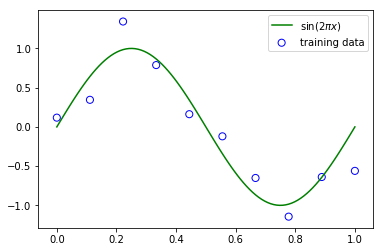

In [4]:
np.random.seed(1234)

sample_sz = 10
test_sz = 100
x_train, y_train = create_toy_data(sin_x, sample_sz, 0.25)
x_test = np.linspace(0, 1, test_sz)
y_test = sin_x(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

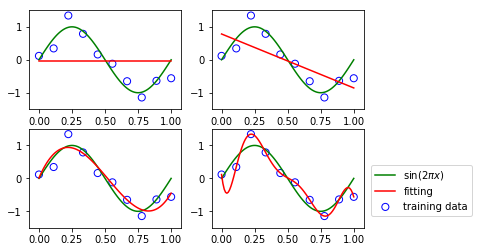

In [5]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

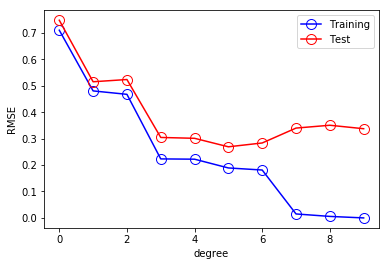

In [6]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

x_test, y_test = create_toy_data(sin_x, test_sz, 0.25)
x_test = x_test[:, np.newaxis]

for i in range(10):
    feature = PolynomialFeatures(i)
    X_train = feature.fit_transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

Coef [  0.           5.32521441 -10.02191694  -4.31659336   1.82142271
   4.53434394   4.39530839   2.42931554  -0.60967929  -4.23583737]


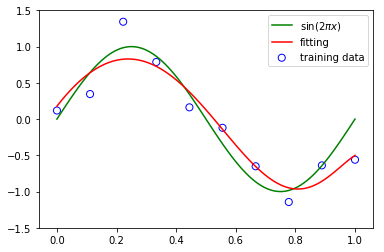

In [23]:
from sklearn.linear_model import Ridge

x_test = np.linspace(0, 1, test_sz)
y_test = sin_x(x_test)
x_test = x_test[:, np.newaxis]

feature = PolynomialFeatures(9)
X_train = feature.fit_transform(x_train)
X_test = feature.transform(x_test)

model = Ridge(alpha=1e-3)
model.fit(X_train, y_train)
print('Coef', model.coef_)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

1.1549014852081028


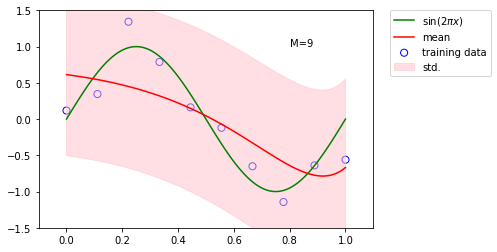

In [22]:
from sklearn.linear_model import BayesianRidge
#alpha is precision for error
alpha = 1e-6
# lambda is precision for weights
lambda_ = 1e-6

model = BayesianRidge(alpha_1=alpha,
    alpha_2=alpha,
    lambda_1=lambda_,
    lambda_2=lambda_)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test.ravel(), y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()